In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
mean=[1,1]
cov=[[4,3],[3,5]]

In [3]:
a=cov[0][1]/(math.sqrt(cov[0][0])*math.sqrt(cov[1][1]))

In [4]:
aforfunction=a*math.sqrt(cov[0][0])/math.sqrt(cov[1][1])

In [5]:
#Defining function for plotting
def g(xforfunction):
    return 1+aforfunction*(xforfunction-1)

In [6]:
#Xtemp to help me plot the graph.
Xtemp=np.random.normal(0,1,50)

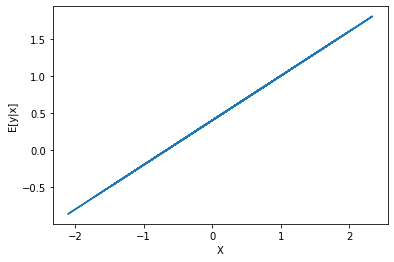

In [7]:
plt.plot(Xtemp,g(Xtemp))
plt.ylabel("E[y|x]")
plt.xlabel("X")
plt.show(block = False)

In [8]:
#Initializing lists
D=[]
Theta=[]
Y=[]
#Generating 100 data  sets 𝐷𝑖, 𝑖 =1,...100,  each  one  consisting  of 𝑁=50 randomly 
for i in range (0,100):
    x1=np.random.multivariate_normal(mean,cov,50)
    y1=x1[:,0]
#Adding noise to y
    y1=y1+np.random.normal(0,1,50)
    X=np.column_stack((np.ones(50),x1[:,1]))
#Finding Linear Estimator for each
    theta1=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y1))
    Theta.append(theta1)
    D.append(x1)

In [9]:
#Defining function for plotting
def f(x,theta):
    return theta[0]+theta[1]*x

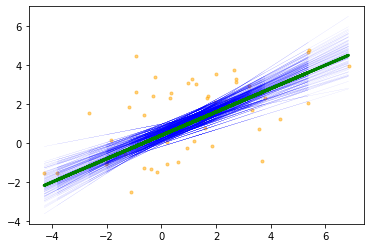

In [21]:
for i in range(0,100):
    plt.plot(x1[:,1],f(x1[:,1],Theta[i]),"b",linewidth=0.02)
plt.plot(x1[:,1],g(x1[:,1]),"g",linewidth=3)
plt.scatter(x1[:,1],y1,c="orange",alpha=0.5,marker=".")
plt.show()

In [11]:
Theta=np.array(Theta)
X=np.array(X)

In [12]:
#Initializing lists
D=[]
Theta2=[]
Y=[]
#Generating 100 data  sets 𝐷𝑖, 𝑖 =1,...100,  each  one  consisting  of 𝑁=5000 randomly 
for i in range (0,100):
    x2=np.random.multivariate_normal(mean,cov,5000)
    y2=x2[:,0]
    #Adding noise
    y2=y2+np.random.normal(0,1,5000)
    X=np.column_stack((np.ones(5000),x2[:,1]))
    #Finding linear estimator for each
    theta2=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y2))
    Theta2.append(theta2)
    D.append(x2)

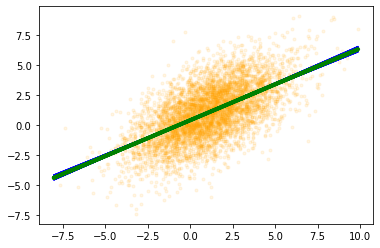

In [20]:
#Plotting graph
for i in range(0,100):
    plt.plot(x2[:,1],f(x2[:,1],Theta2[i]),"b",linewidth=1)
plt.plot(x2[:,1],g(x2[:,1]),"g",linewidth=4)
plt.scatter(x2[:,1],y2,c="orange",alpha=0.1,marker=".")
plt.show()

We see that when we take 5000 data points instead of 50 per generation our model estimations are close to 
the true model's equation.(Lower MSE)MSE is split into two parts; first one is the variance and the second one is the bias.By increasing the number of data points (N) we effectively reduce the variance of the model thus getting a lower MSE and consequently getting better estimations!